# Table of content
1. Import libraries & Data sets
2. Data Wrangling & Cleaning
3. Check for extreme values
4. Create choropleth maps
    1. Listings by Neighborhoods groups

# 1. Import Libraries & Data sets#Import libraries & Data sets

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import geopandas as gpd
from shapely import wkt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('fivethirtyeight')

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#Creating the path to import data
path=r'C:\Users\maryg\OneDrive\Career Foundry-Data Anlytics\Data Analytics Immersion\Exercise 6\12.7.23 Project'

In [4]:
#Importing Data
nyc_airbnb = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'upd_clean_nyc_airbnb.pkl'))

In [5]:
nyc_airbnb

id    host_id   nbhd_grp                nbhd  \
0                     2595       2845  Manhattan             Midtown   
1                     5121       7356   Brooklyn  Bedford-Stuyvesant   
2                     9357      30193  Manhattan      Hell's Kitchen   
3                     6848      15991   Brooklyn        Williamsburg   
4                    10452      35935   Brooklyn  Bedford-Stuyvesant   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
0      40.753560 -73.985590  Entire home/apt    240              30   
1      40.685350 -73.955120     Private room     66              30   
2      40.767240 -73.986640  Entire home/apt    175              45   
3      40.709350 -73.953420  Entire home/apt     81              30   
4      40.682940 -73.956820     Private room     90              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       no_reviews last_review_date  no_monthly_reviews  host_listings_count  \
0              49        6/21/2022                0.29                    3   
1              50        12/2/2019                0.28                    2   
2              58        8/13/2017                0.34                    1   
3             191        8/14/2023                1.09                    1   
4              80        9/16/2023                0.49                    4   
...           ...              ...                 ...                  ...   
39155           0              nan                 NaN                   56   
39156           0              nan                 NaN                    1   
39157           0              nan                 NaN                  647   
39158           0              nan                 NaN                  647   
39159           0              nan                 NaN                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
0            365                  0        1             1   min price  
1            120                  0        2             2   low price  
2            340                  0        1             1   min price  
3            110                  5        2             1   low price  
4            290                  2        2             2   low price  
...          ...                ...      ...           ...         ...  
39155         62                  0        1             2   low price  
39156        258                  0        2             1   low price  
39157        333                  0        1             1   min price  
39158        365                  0        1             1  high price  
39159        365                  0        1             1   min price  

[39160 rows x 18 columns]

# 2. Data Wrangling & Cleaning

In [6]:
nyc_airbnb.columns

Index(['id', 'host_id', 'nbhd_grp', 'nbhd', 'latitude', 'longitude',
       'room_type', 'price', 'min_night_stay', 'no_reviews',
       'last_review_date', 'no_monthly_reviews', 'host_listings_count',
       '365_avail', 'no_of_reviews_ltm', 'nbhd_no', 'room_type_no',
       'price_range'],
      dtype='object')

In [7]:
nyc_airbnb.rename(columns={'nbhd_grp':'boroname'}, inplace=True)

In [8]:
nyc_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39160 entries, 0 to 39159
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39160 non-null  int64  
 1   host_id              39160 non-null  int64  
 2   boroname             39160 non-null  object 
 3   nbhd                 39160 non-null  object 
 4   latitude             39160 non-null  float64
 5   longitude            39160 non-null  float64
 6   room_type            39160 non-null  object 
 7   price                39160 non-null  int64  
 8   min_night_stay       39160 non-null  int64  
 9   no_reviews           39160 non-null  int64  
 10  last_review_date     39160 non-null  object 
 11  no_monthly_reviews   28211 non-null  float64
 12  host_listings_count  39160 non-null  int64  
 13  365_avail            39160 non-null  int64  
 14  no_of_reviews_ltm    39160 non-null  int64  
 15  nbhd_no              39160 non-null 

In [9]:
nyc_airbnb.dtypes

id                       int64
host_id                  int64
boroname                object
nbhd                    object
latitude               float64
longitude              float64
room_type               object
price                    int64
min_night_stay           int64
no_reviews               int64
last_review_date        object
no_monthly_reviews     float64
host_listings_count      int64
365_avail                int64
no_of_reviews_ltm        int64
nbhd_no                  int32
room_type_no             int32
price_range             object
dtype: object

In [10]:
nyc_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  3.916000e+04  3.916000e+04  39160.000000  39160.000000  39160.000000   
mean   2.932430e+17  1.575643e+08     40.729372    -73.945897    205.995480   
std    3.943340e+17  1.693066e+08      0.056645      0.054958    466.662167   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      0.000000   
25%    1.991531e+07  1.654341e+07     40.688880    -73.982819     76.000000   
50%    4.574172e+07  7.831966e+07     40.726470    -73.953960    130.000000   
75%    7.354150e+17  2.783108e+08     40.762632    -73.926260    220.000000   
max    1.015028e+18  5.442621e+08     40.911380    -73.713650  30000.000000   

       min_night_stay    no_reviews  no_monthly_reviews  host_listings_count  \
count    39160.000000  39160.000000        28211.000000         39160.000000   
mean        30.272165     25.584397            1.069862            39.493105   
std         26.534306     57.488642            1.730834           117.040976   
min          1.000000      0.000000            0.010000             1.000000   
25%         30.000000      0.000000            0.110000             1.000000   
50%         30.000000      4.000000            0.410000             1.000000   
75%         30.000000     23.000000            1.505000             6.000000   
max       1250.000000   1854.000000           73.720000           647.000000   

          365_avail  no_of_reviews_ltm       nbhd_no  room_type_no  
count  39160.000000       39160.000000  39160.000000  39160.000000  
mean     153.915628           6.735674      1.816139      1.478115  
std      144.305706          17.023977      0.884103      0.545001  
min        0.000000           0.000000      1.000000      1.000000  
25%        0.000000           0.000000      1.000000      1.000000  
50%      130.000000           0.000000      2.000000      1.000000  
75%      309.000000           5.000000      2.000000      2.000000  
max      365.000000         900.000000      5.000000      4.000000

Information Needed:

1. Listings by Neighborhoods groups 
2. Price difference in neighborhood groups & room types
3. Reviews count to determine bookings on neighborhood groups & room types
Additonal Questions:
1. Which neighboorhoods have the most hosts?

In [11]:
#Create a sublet without unnecessary columns
#Focusing on reviews within the last 12 months because some Airbnbs could have just started operating
nyc_abnb = nyc_airbnb.drop(columns=['no_reviews', 'no_monthly_reviews', 'last_review_date'])

In [12]:
nyc_abnb

id    host_id   boroname                nbhd  \
0                     2595       2845  Manhattan             Midtown   
1                     5121       7356   Brooklyn  Bedford-Stuyvesant   
2                     9357      30193  Manhattan      Hell's Kitchen   
3                     6848      15991   Brooklyn        Williamsburg   
4                    10452      35935   Brooklyn  Bedford-Stuyvesant   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
0      40.753560 -73.985590  Entire home/apt    240              30   
1      40.685350 -73.955120     Private room     66              30   
2      40.767240 -73.986640  Entire home/apt    175              45   
3      40.709350 -73.953420  Entire home/apt     81              30   
4      40.682940 -73.956820     Private room     90              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       host_listings_count  365_avail  no_of_reviews_ltm  nbhd_no  \
0                        3        365                  0        1   
1                        2        120                  0        2   
2                        1        340                  0        1   
3                        1        110                  5        2   
4                        4        290                  2        2   
...                    ...        ...                ...      ...   
39155                   56         62                  0        1   
39156                    1        258                  0        2   
39157                  647        333                  0        1   
39158                  647        365                  0        1   
39159                  647        365                  0        1   

       room_type_no price_range  
0                 1   min price  
1                 2   low price  
2                 1   min price  
3                 1   low price  
4                 2   low price  
...             ...         ...  
39155             2   low price  
39156             1   low price  
39157             1   min price  
39158             1  high price  
39159             1   min price  

[39160 rows x 15 columns]

In [13]:
#Check for missing values
nyc_abnb.isnull().sum()

id                     0
host_id                0
boroname               0
nbhd                   0
latitude               0
longitude              0
room_type              0
price                  0
min_night_stay         0
host_listings_count    0
365_avail              0
no_of_reviews_ltm      0
nbhd_no                0
room_type_no           0
price_range            0
dtype: int64

In [15]:
#Checked for duplicates
nyc_abnb_dup = nyc_abnb.duplicated()

In [16]:
nyc_abnb_dup

0        False
1        False
2        False
3        False
4        False
         ...  
39155    False
39156    False
39157    False
39158    False
39159    False
Length: 39160, dtype: bool

# 3. Check for extreme values

In [17]:
nyc_abnb.columns

Index(['id', 'host_id', 'boroname', 'nbhd', 'latitude', 'longitude',
       'room_type', 'price', 'min_night_stay', 'host_listings_count',
       '365_avail', 'no_of_reviews_ltm', 'nbhd_no', 'room_type_no',
       'price_range'],
      dtype='object')

In [18]:
nyc_abnb.describe()

id       host_id      latitude     longitude         price  \
count  3.916000e+04  3.916000e+04  39160.000000  39160.000000  39160.000000   
mean   2.932430e+17  1.575643e+08     40.729372    -73.945897    205.995480   
std    3.943340e+17  1.693066e+08      0.056645      0.054958    466.662167   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      0.000000   
25%    1.991531e+07  1.654341e+07     40.688880    -73.982819     76.000000   
50%    4.574172e+07  7.831966e+07     40.726470    -73.953960    130.000000   
75%    7.354150e+17  2.783108e+08     40.762632    -73.926260    220.000000   
max    1.015028e+18  5.442621e+08     40.911380    -73.713650  30000.000000   

       min_night_stay  host_listings_count     365_avail  no_of_reviews_ltm  \
count    39160.000000         39160.000000  39160.000000       39160.000000   
mean        30.272165            39.493105    153.915628           6.735674   
std         26.534306           117.040976    144.305706          17.023977   
min          1.000000             1.000000      0.000000           0.000000   
25%         30.000000             1.000000      0.000000           0.000000   
50%         30.000000             1.000000    130.000000           0.000000   
75%         30.000000             6.000000    309.000000           5.000000   
max       1250.000000           647.000000    365.000000         900.000000   

            nbhd_no  room_type_no  
count  39160.000000  39160.000000  
mean       1.816139      1.478115  
std        0.884103      0.545001  
min        1.000000      1.000000  
25%        1.000000      1.000000  
50%        2.000000      1.000000  
75%        2.000000      2.000000  
max        5.000000      4.000000

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


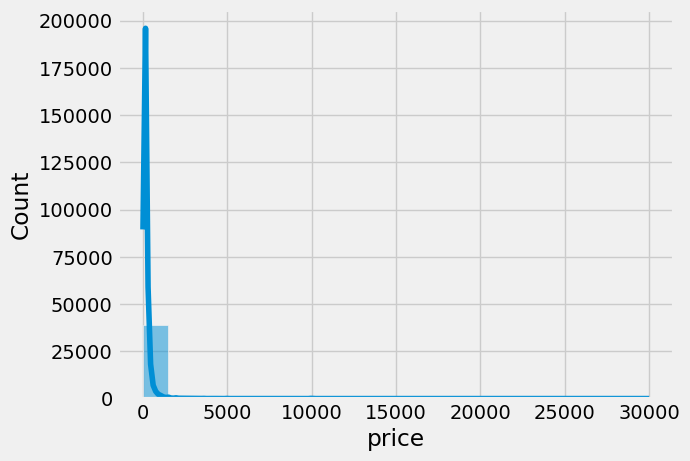

In [19]:
#Checking for extreme values 'price'
hist_price = sns.histplot(nyc_abnb['price'], bins=20, kde = True)

In [20]:
#The price column has a extreme value(s) of 30,000

In [21]:
# Check how many extreme values exist
nyc_abnb[nyc_abnb['price'] > 5000]

id    host_id   boroname                nbhd  \
1526              2243699    1483320  Manhattan           Chinatown   
1561              2271504   11598359   Brooklyn        Clinton Hill   
2428              4251721   21939817     Queens    Long Island City   
2494              4308991    6195809  Manhattan        East Village   
2728              4737930    1235070  Manhattan         East Harlem   
4603              8069030   42619297   Brooklyn         Fort Greene   
5327              9528920    3906464  Manhattan     Lower East Side   
6835             12520066   66240032  Manhattan   Greenwich Village   
7586             13925864   58480311     Queens    Long Island City   
8078             15345019   88972153   Brooklyn          Greenpoint   
8428             16330110  105075484   Brooklyn            Canarsie   
8810             17416959    1261480  Manhattan              Harlem   
10011            20464496   49519069     Queens           Briarwood   
11151            22436899   72390391  Manhattan     Upper West Side   
13080            28888147   43825799  Manhattan     Upper East Side   
14061            31177983   57677436  Manhattan     Upper East Side   
14090            31219800  172226912  Manhattan         Murray Hill   
15060            34490359  260618374  Manhattan    Theater District   
15069            34490368  260618374  Manhattan    Theater District   
15671            36056808  271248669  Manhattan             Tribeca   
16731            38993493  298338860  Manhattan             Midtown   
16733            38993556  298338860  Manhattan             Midtown   
16735            38993679  298338860  Manhattan             Midtown   
16905            39574087  266741420  Manhattan     Lower East Side   
21557            49920227   76699286      Bronx            Longwood   
23494            52862058   57586379  Manhattan  Financial District   
27287  658503812592195974  363776653  Manhattan         East Harlem   
28266  692813905111173363   34906299  Manhattan   Battery Park City   
31989  812431157705601911  496944100  Manhattan                SoHo   
31992  812431247715205745  496944100  Manhattan                SoHo   
31993  812431333020367058  496944100  Manhattan                SoHo   
32145  812941474805200850  496944100  Manhattan                SoHo   
32147  812941566017191022  496944100  Manhattan                SoHo   
32148  812941643927531244  496944100  Manhattan                SoHo   
32810  830656153550799267   76166434  Manhattan             Midtown   
32818  830682282357157632   76166434  Manhattan             Midtown   
35479  903598948687604703   34906299  Manhattan     Lower East Side   
35502  904523946643334652  326084746  Manhattan                SoHo   
35503  904524100106225881  326084746  Manhattan                SoHo   
35506  904524223667771043  326084746  Manhattan                SoHo   
35512  904526596298258537  326084746  Manhattan             Midtown   
35523  904527164135938359  326084746  Manhattan             Midtown   
35810  912396732617862267   34906299  Manhattan     Upper East Side   
35812  912401924564160654   34906299  Manhattan     Upper East Side   
36897  954380532204630113  501999278  Manhattan             Midtown   

        latitude  longitude        room_type  price  min_night_stay  \
1526   40.717100 -73.999050  Entire home/apt   5250              30   
1561   40.687990 -73.965200  Entire home/apt   6500              30   
2428   40.742490 -73.952360     Private room  10000              30   
2494   40.724800 -73.989510     Private room   9990              30   
2728   40.794350 -73.938930  Entire home/apt   9999              30   
4603   40.692310 -73.969670  Entire home/apt   7498              30   
5327   40.713020 -73.985730     Private room   7314              99   
6835   40.731210 -73.994970  Entire home/apt   6000              30   
7586   40.761280 -73.931410  Entire home/apt  10000              30   
8078   40.730680 -73.957410     Private room  

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


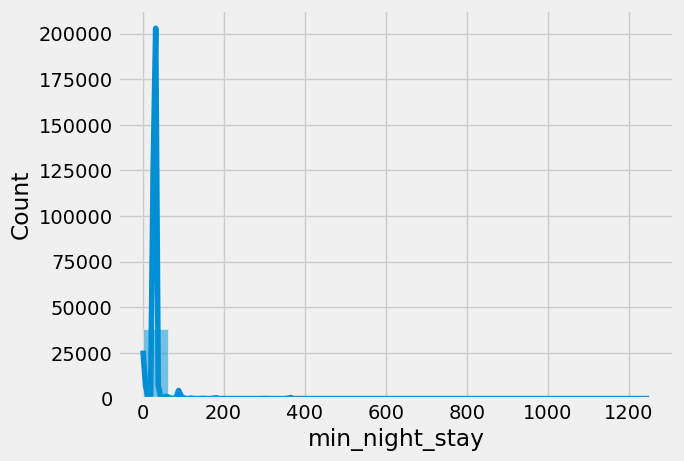

In [22]:
#Checking for extreme values 'min_night_stay'
hist_min_night_stay = sns.histplot(nyc_abnb['min_night_stay'], bins=20, kde = True)

In [ ]:
#The min_night_stay column has extreme values up to 1250 nights

In [23]:
nyc_abnb[nyc_abnb['min_night_stay'] > 400]

id    host_id   boroname                 nbhd   latitude  \
1769    2942732     160337  Manhattan   Washington Heights  40.835630   
2392    4204302   17550546  Manhattan    Greenwich Village  40.732930   
3127    5431845    3680008     Queens     Long Island City  40.752790   
3455    6169897   10720264  Manhattan               Harlem  40.820440   
4669    8341919   43945071     Queens     Long Island City  40.746380   
4829    8668115    8996336   Brooklyn        Crown Heights  40.670420   
6229   11096888    2228137   Brooklyn      Windsor Terrace  40.649310   
13590  30378211  200401254  Manhattan    Greenwich Village  40.731520   
15651  36002802  265172138  Manhattan      Upper East Side  40.770300   
17248  40302355  257908724  Manhattan  Morningside Heights  40.804400   
17320  40368174   42061478  Manhattan   Washington Heights  40.854540   
18437  43002373  193904277     Queens          Kew Gardens  40.709190   
22501  51425482  380355687  Manhattan         West Village  40.733143   

       longitude        room_type  price  min_night_stay  host_listings_count  \
1769  -73.947860  Entire home/apt     60            1124                    1   
2392  -73.997820  Entire home/apt    180            1250                    1   
3127  -73.940890  Entire home/apt    134             500                    1   
3455  -73.956240  Entire home/apt     75             500                    1   
4669  -73.956180  Entire home/apt    199             480                    1   
4829  -73.948390     Private room     50             500                    1   
6229  -73.979770     Private room     45             500                    1   
13590 -74.000520      Shared room     31             999                    1   
15651 -73.961150  Entire home/apt    500             500                    1   
17248 -73.965740  Entire home/apt     50            1000                    1   
17320 -73.932170     Private room    100            1000                    1   
18437 -73.827270     Private room    130             500                    1   
22501 -74.009605  Entire home/apt    202             700                    1   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
1769         365                  0        1             1   low price  
2392           0                  0        1             1   min price  
3127          90                  0        3             1   low price  
3455           0                  0        1             1   low price  
4669           0                  0        3             1   min price  
4829         364                  0        2             2   low price  
6229         358                  0        2             2   low price  
13590          0                  0        1             3   low price  
15651         89                  0        1             1  high price  
17248          0                  0        1             1   low price  
17320        179                  0        1             2   low price  
18437         89                  0        3             2   low price  
22501         39                  4        1             1   min price

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


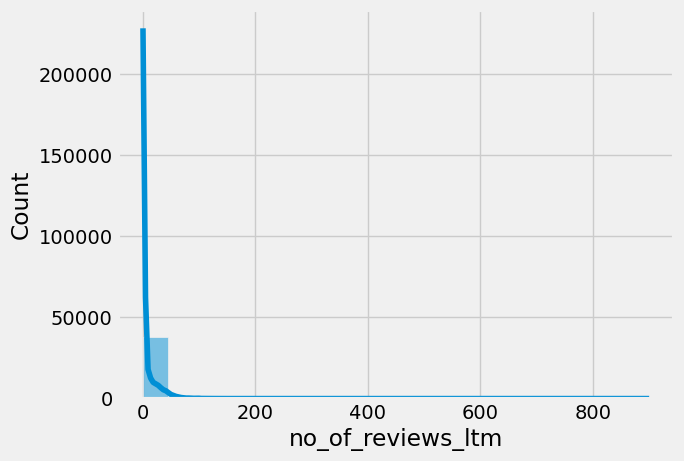

In [24]:
#Checking for extreme values 'no_of_reviews_ltm'
hist_no_of_reviews_ltm = sns.histplot(nyc_abnb['no_of_reviews_ltm'], bins=20, kde = True)

In [ ]:
#The no_of_reviews_ltm has extreme values up to 900.

In [25]:
nyc_abnb[nyc_abnb['no_of_reviews_ltm'] > 100]

id    host_id   boroname              nbhd   latitude  \
8818             17665943  119987770     Queens     East Elmhurst  40.760940   
9203             18671835  129743937     Queens     East Elmhurst  40.758090   
11934            24996332  129743937     Queens     East Elmhurst  40.758000   
12770            27866657  101498908   Brooklyn     East Flatbush  40.650620   
15053            34490351  260618374  Manhattan  Theater District  40.755440   
...                   ...        ...        ...               ...        ...   
29903  752124066836971423   88566861  Manhattan   Lower East Side  40.720200   
30036  757149473920319178  487163726     Queens           Jamaica  40.669780   
30050  757318950542595961   92900025     Queens         Laurelton  40.684669   
33285  842859220033081539  149431096     Queens           Jamaica  40.676098   
33833  858697692672545141  503712643  Manhattan           Chelsea  40.749721   

       longitude     room_type  price  min_night_stay  host_listings_count  \
8818  -73.878460  Private room     72              30                    2   
9203  -73.868060  Private room     55              30                    2   
11934 -73.869910  Private room     65              30                    2   
12770 -73.952270  Private room     68               1                    2   
15053 -73.988370    Hotel room    659               1                   13   
...          ...           ...    ...             ...                  ...   
29903 -73.990600  Private room    296               1                    3   
30036 -73.774950  Private room    130              30                    1   
30050 -73.747327  Private room     70              30                    2   
33285 -73.778631  Private room     63               1                    3   
33833 -73.994724  Private room    142               1                    1   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
8818         348                106        3             2   low price  
9203          89                114        3             2   low price  
11934         61                110        3             2   low price  
12770         51                109        2             2   low price  
15053        342                136        1             4  high price  
...          ...                ...      ...           ...         ...  
29903        295                116        1             2   min price  
30036        364                102        3             2   low price  
30050        349                114        3             2   low price  
33285        305                125        3             2   low price  
33833        361                337        1             2   low price  

[64 rows x 15 columns]

In [26]:
# Clean extreme values
clean_nyc_abnb = nyc_abnb[(nyc_abnb['no_of_reviews_ltm'] <= 100) & (nyc_abnb['min_night_stay'] <= 400) & (nyc_abnb['price'] <= 5000)]

In [27]:
clean_nyc_abnb

id    host_id   boroname                nbhd  \
0                     2595       2845  Manhattan             Midtown   
1                     5121       7356   Brooklyn  Bedford-Stuyvesant   
2                     9357      30193  Manhattan      Hell's Kitchen   
3                     6848      15991   Brooklyn        Williamsburg   
4                    10452      35935   Brooklyn  Bedford-Stuyvesant   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
0      40.753560 -73.985590  Entire home/apt    240              30   
1      40.685350 -73.955120     Private room     66              30   
2      40.767240 -73.986640  Entire home/apt    175              45   
3      40.709350 -73.953420  Entire home/apt     81              30   
4      40.682940 -73.956820     Private room     90              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       host_listings_count  365_avail  no_of_reviews_ltm  nbhd_no  \
0                        3        365                  0        1   
1                        2        120                  0        2   
2                        1        340                  0        1   
3                        1        110                  5        2   
4                        4        290                  2        2   
...                    ...        ...                ...      ...   
39155                   56         62                  0        1   
39156                    1        258                  0        2   
39157                  647        333                  0        1   
39158                  647        365                  0        1   
39159                  647        365                  0        1   

       room_type_no price_range  
0                 1   min price  
1                 2   low price  
2                 1   min price  
3                 1   low price  
4                 2   low price  
...             ...         ...  
39155             2   low price  
39156             1   low price  
39157             1   min price  
39158             1  high price  
39159             1   min price  

[39038 rows x 15 columns]

In [28]:
#Comparing row and column count 
nyc_abnb.shape

(39160, 15)

In [29]:
clean_nyc_abnb.shape

(39038, 15)

# 4. Create choropleth maps

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='longitude', ylabel='latitude'>

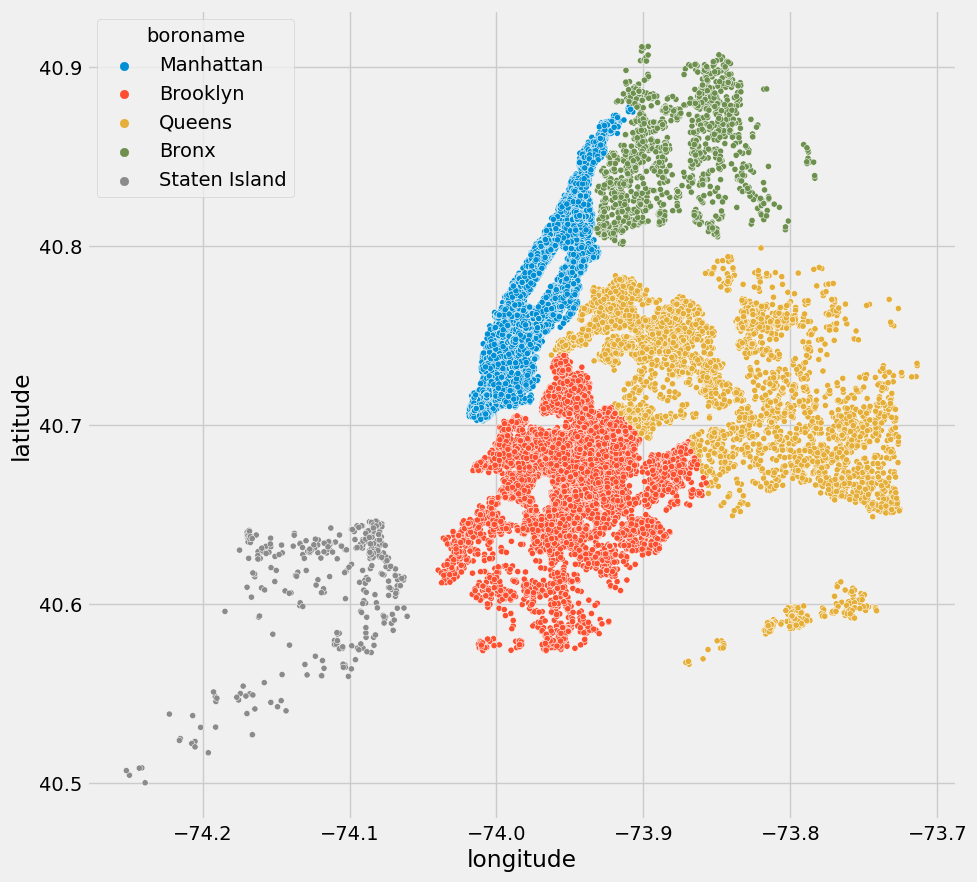

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=20, data=clean_nyc_abnb)

### a. Listings by Neighborhoods groups

In [31]:
#Create subset with Aibnb count by neighbirhood
borough_count = clean_nyc_abnb.groupby('boroname').agg('count').reset_index()

In [32]:
borough_count

boroname     id  host_id   nbhd  latitude  longitude  room_type  \
0          Bronx   1365     1365   1365      1365       1365       1365   
1       Brooklyn  14289    14289  14289     14289      14289      14289   
2      Manhattan  17004    17004  17004     17004      17004      17004   
3         Queens   6008     6008   6008      6008       6008       6008   
4  Staten Island    372      372    372       372        372        372   

   price  min_night_stay  host_listings_count  365_avail  no_of_reviews_ltm  \
0   1365            1365                 1365       1365               1365   
1  14289           14289                14289      14289              14289   
2  17004           17004                17004      17004              17004   
3   6008            6008                 6008       6008               6008   
4    372             372                  372        372                372   

   nbhd_no  room_type_no  price_range  
0     1365          1365         1365  
1    14289         14289        14289  
2    17004         17004        17004  
3     6008          6008         6008  
4      372           372          372

In [33]:
#Using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

C:\Users\maryg\AppData\Local\Temp\ipykernel_3876\4041603262.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))


In [34]:
nyc

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [35]:
#Rename column to match nyc 
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)

In [39]:
# Merge datsets
nyc_nbhd_count_geo = nyc.merge(borough_count, on='boroname')

In [37]:
nyc_nbhd_count_geo

BoroCode       boroname     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry     id  host_id   nbhd  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....    372      372    372   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...   6008     6008   6008   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  14289    14289  14289   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  17004    17004  17004   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...   1365     1365   1365   

   latitude  longitude  room_type  price  min_night_stay  host_listings_count  \
0       372        372        372    372             372                  372   
1      6008       6008       6008   6008            6008                 6008   
2     14289      14289      14289  14289           14289                14289   
3     17004      17004      17004  17004           17004                17004   
4      1365       1365       1365   1365            1365                 1365   

   365_avail  no_of_reviews_ltm  nbhd_no  room_type_no  price_range  
0        372                372      372           372          372  
1       6008               6008     6008          6008         6008  
2      14289              14289    14289         14289        14289  
3      17004              17004    17004         17004        17004  
4       1365               1365     1365          1365         1365

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

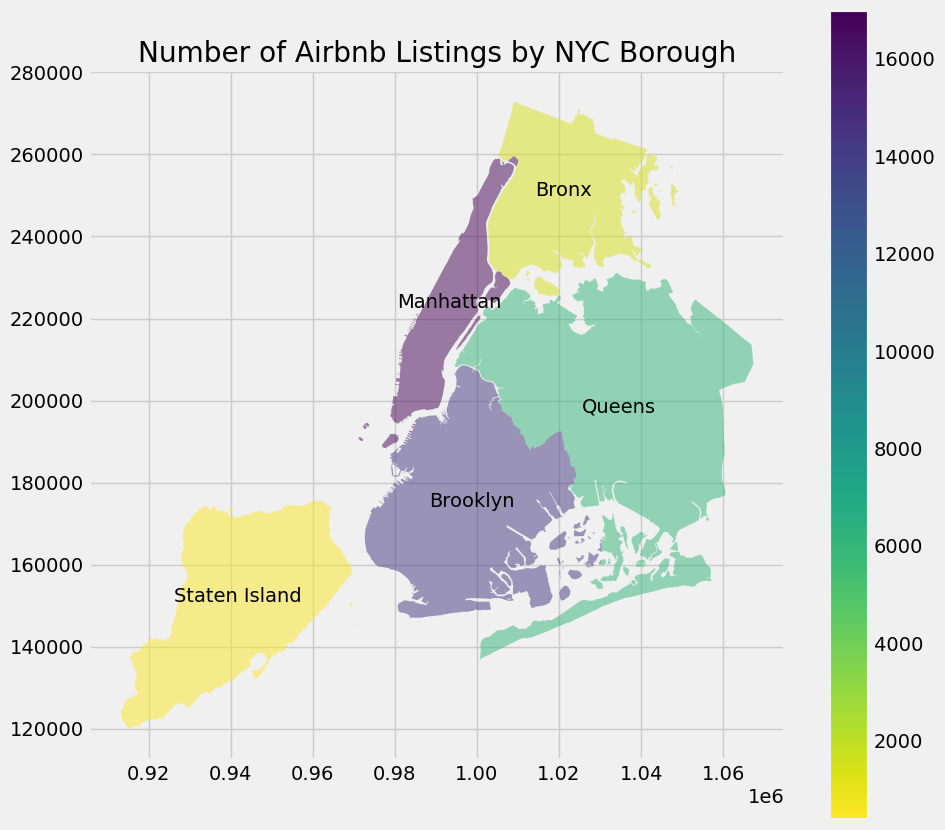

In [38]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_nbhd_count_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
nyc_nbhd_count_geo.apply(lambda x: ax.annotate(text=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('on')

### b. Price difference in neighborhood groups

In [40]:
#Create subset with average price per neighborhood groups
ave_price_nbhd =  clean_nyc_abnb.groupby('boroname').mean('price')

In [41]:
ave_price_nbhd

id       host_id   latitude  longitude       price  \
boroname                                                                      
Bronx          3.679876e+17  2.259884e+08  40.850313 -73.880633  115.385348   
Brooklyn       2.539620e+17  1.260044e+08  40.681123 -73.948418  153.385891   
Manhattan      3.011350e+17  1.620032e+08  40.763805 -73.975521  260.675488   
Queens         3.460111e+17  2.000588e+08  40.726577 -73.860452  123.817077   
Staten Island  3.110878e+17  2.005739e+08  40.609705 -74.113600  128.994624   

               min_night_stay  host_listings_count   365_avail  \
boroname                                                         
Bronx               30.257875             3.184615  211.147253   
Brooklyn            32.126181            24.056547  141.721884   
Manhattan           27.888732            56.092272  150.409904   
Queens              31.262150            39.998668  174.450899   
Staten Island       30.967742             2.405914  222.911290   

               no_of_reviews_ltm  nbhd_no  room_type_no  
boroname                                                 
Bronx                   9.088645      4.0      1.605128  
Brooklyn                7.183708      2.0      1.508853  
Manhattan               4.463597      1.0      1.386203  
Queens                  9.177097      3.0      1.630326  
Staten Island          11.239247      5.0      1.497312

In [42]:
#Merge datasets
ave_price_nbhd_geo = nyc.merge(ave_price_nbhd, on='boroname')

In [43]:
ave_price_nbhd_geo

BoroCode       boroname     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry            id  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  3.110878e+17   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  3.460111e+17   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  2.539620e+17   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  3.011350e+17   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...  3.679876e+17   

        host_id   latitude  longitude       price  min_night_stay  \
0  2.005739e+08  40.609705 -74.113600  128.994624       30.967742   
1  2.000588e+08  40.726577 -73.860452  123.817077       31.262150   
2  1.260044e+08  40.681123 -73.948418  153.385891       32.126181   
3  1.620032e+08  40.763805 -73.975521  260.675488       27.888732   
4  2.259884e+08  40.850313 -73.880633  115.385348       30.257875   

   host_listings_count   365_avail  no_of_reviews_ltm  nbhd_no  room_type_no  
0             2.405914  222.911290          11.239247      5.0      1.497312  
1            39.998668  174.450899           9.177097      3.0      1.630326  
2            24.056547  141.721884           7.183708      2.0      1.508853  
3            56.092272  150.409904           4.463597      1.0      1.386203  
4             3.184615  211.147253           9.088645      4.0      1.605128

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

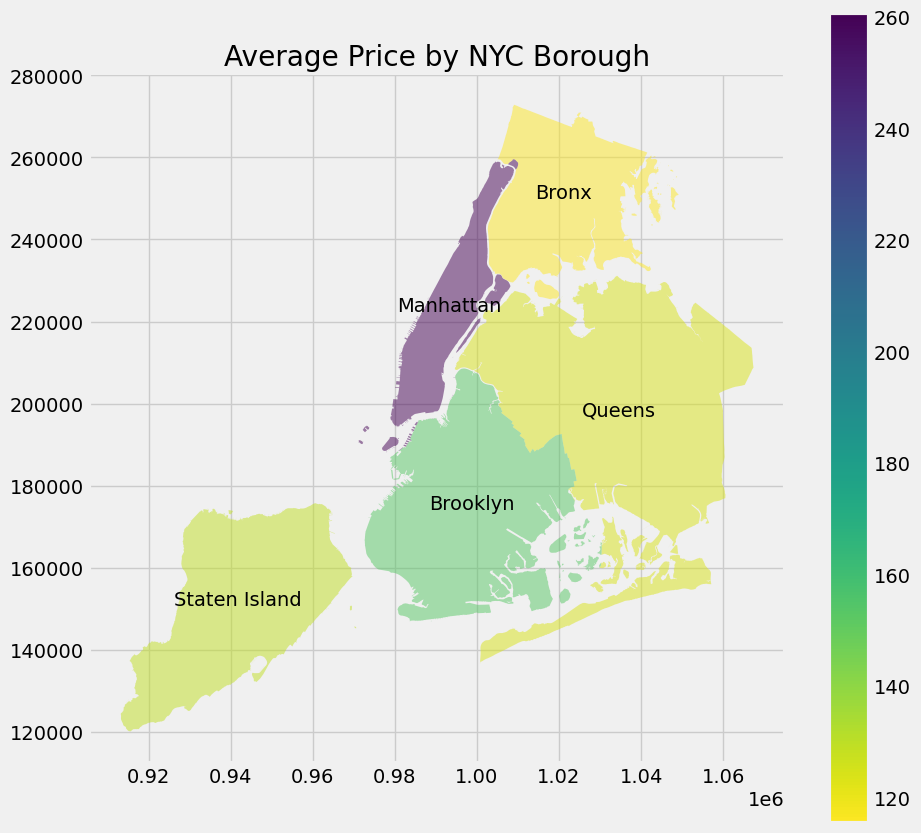

In [44]:
#Plot the average price by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
ave_price_nbhd_geo.plot(column='price', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
ave_price_nbhd_geo.apply(lambda x: ax.annotate(text=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Average Price by NYC Borough")
plt.axis('on')

### c. Total reviews to determine bookings on neighborhood groups

In [45]:
#create a subset review count per neighborhood groups
count_reviews_nbhd =  clean_nyc_abnb.groupby('boroname').sum('no_of_reviews_ltm')

In [46]:
count_reviews_nbhd 

id        host_id       latitude  \
boroname                                                           
Bronx          4240966505294194854   308474208309   55760.677266   
Brooklyn      -5145418594858975619  1800477233550  581292.571528   
Manhattan     -7694499971454421944  2754703247907  693147.735990   
Queens        -5647608505705465652  1201953066003  244685.272791   
Staten Island  5044204647030326904    74613474808   15106.810081   

                  longitude    price  min_night_stay  host_listings_count  \
boroname                                                                    
Bronx         -1.008471e+05   157501           41302                 4347   
Brooklyn      -1.056649e+06  2191731          459051               343744   
Manhattan     -1.257880e+06  4432526          474220               953793   
Queens        -4.437536e+05   743893          187823               240312   
Staten Island -2.757026e+04    47986           11520                  895   

               365_avail  no_of_reviews_ltm  nbhd_no  room_type_no  
boroname                                                            
Bronx             288216              12406     5460          2191  
Brooklyn         2025064             102648    28578         21560  
Manhattan        2557570              75899    17004         23571  
Queens           1048101              55136    18024          9795  
Staten Island      82923               4181     1860           557

In [47]:
#Merged datasets
count_reviews_nbhd_geo = nyc.merge(count_reviews_nbhd, on='boroname')

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

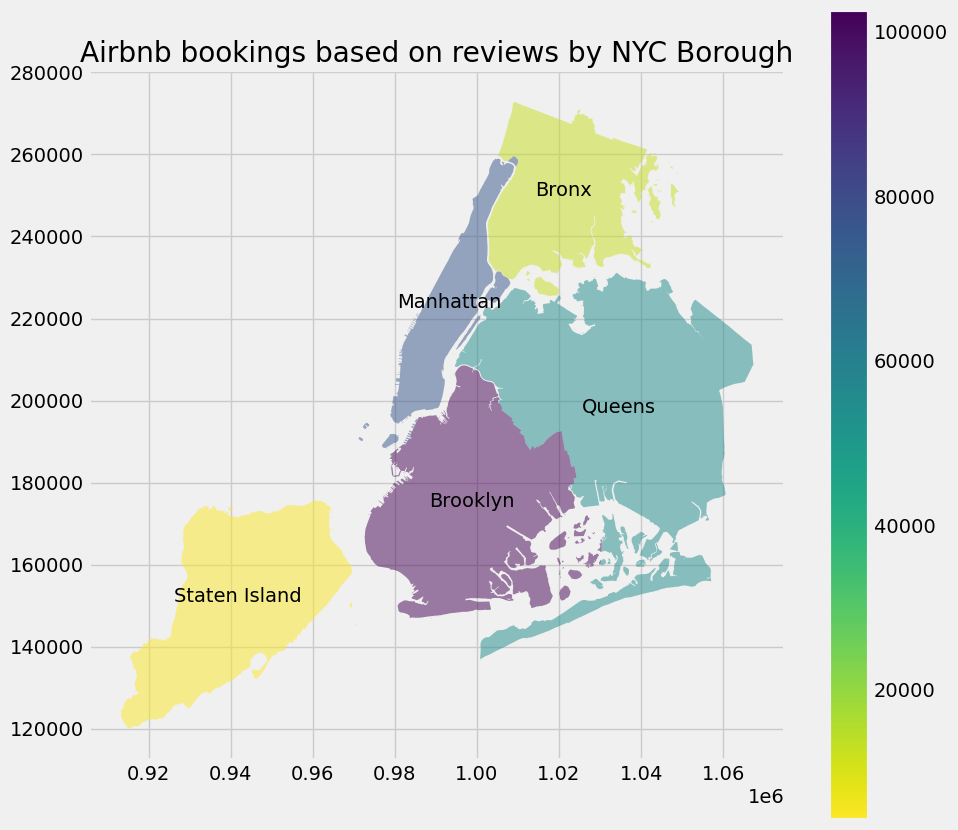

In [48]:
#Plot the rating by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
count_reviews_nbhd_geo.plot(column='no_of_reviews_ltm', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
count_reviews_nbhd_geo.apply(lambda x: ax.annotate(text=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Airbnb bookings based on reviews by NYC Borough")
plt.axis('on')

### d. Hosts count by neighborhood groups

In [49]:
#Create a subset of individual host count per neighborhood groups
host_count_nbhd =  clean_nyc_abnb.groupby('boroname').nunique('host_id')

In [50]:
host_count_nbhd

id  host_id  nbhd  latitude  longitude  room_type  price  \
boroname                                                                     
Bronx           1365      919    49      1286       1289          3    236   
Brooklyn       14289    10111    48      9173       9215          4    632   
Manhattan      17004     9342    32     11397       9678          4   1032   
Queens          6008     3433    51      4922       5254          4    434   
Staten Island    372      263    43       357        359          3    144   

               min_night_stay  host_listings_count  365_avail  \
boroname                                                        
Bronx                      19                   19        260   
Brooklyn                   64                   46        366   
Manhattan                  72                   66        366   
Queens                     34                   29        356   
Staten Island              13                    9        138   

               no_of_reviews_ltm  nbhd_no  room_type_no  price_range  
boroname                                                              
Bronx                         70        1             3            3  
Brooklyn                      94        1             4            3  
Manhattan                     94        1             4            3  
Queens                        94        1             4            3  
Staten Island                 55        1             3            3

In [51]:
#Merged datasets
host_count_nbhd_geo = nyc.merge(host_count_nbhd, on='boroname')

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

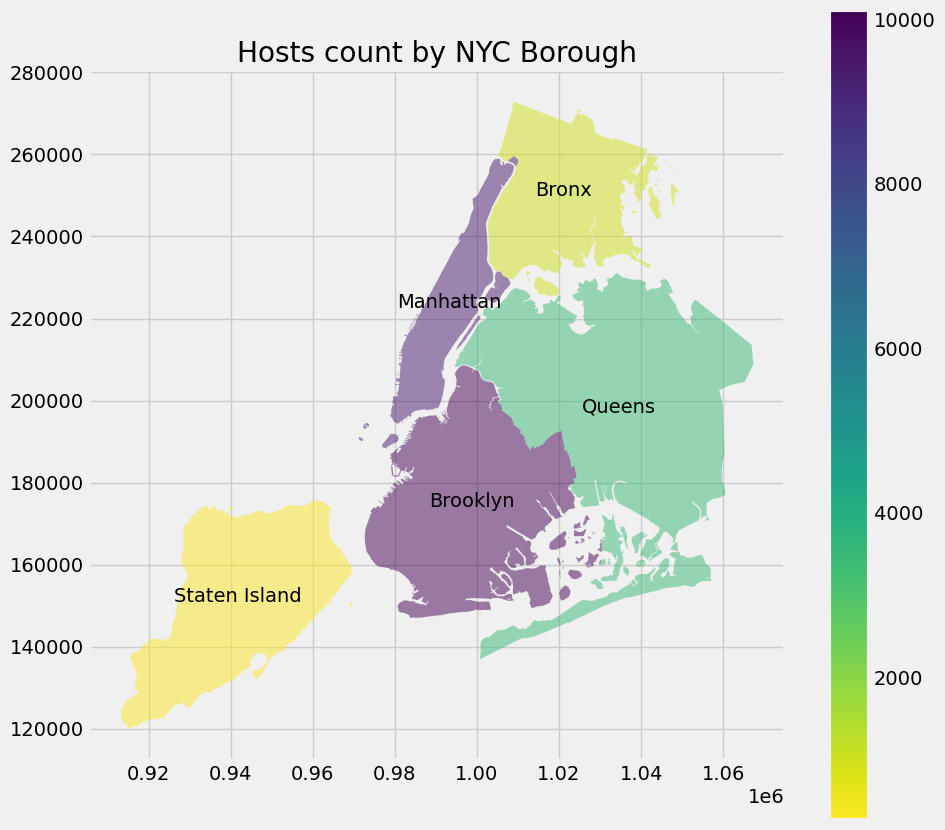

In [52]:
#Plot the host count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
host_count_nbhd_geo.plot(column='host_id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
host_count_nbhd_geo.apply(lambda x: ax.annotate(text=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Hosts count by NYC Borough")
plt.axis('on')

# Discussion
Does the analysis answer any of your existing research questions?
Does the analysis lead you to any new research questions?

## Key Questions:

1. Which neighborhoods have the most Airbnb properties?
This questions was answered in the previous task, but this time a visualization reflecting the amount from lower with a brighter color to darker for a higher Airbnb count per neighborhoood was created

2. Is there a price difference in different neighborhoods?
Similar to the questions above, a visualization was created to reflect the results of this question. 

3. Based on reviews, which room type were booked the most?
Information not avalaible yet. It was not possible to create a visualization for this questions. 

4. Are there any trends across New York?
Yes, Brooklyn gets more booking based on reviews even though they have less Airbnb than Manhattan. 

5. Which neighboorhoods have the most hosts?
Manhattan has the most host out of the neighbohood groups